# 실습1 : 피마 인디언 당뇨병 결정 모델

In [2]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 데이터 로드
dataset = loadtxt('/home/jaeung/Documents/XAI_dataset/pima_indian_diabetes/pima-indians-diabetes.csv',  delimiter=',' , skiprows=1)

x = dataset[: , 0:8]
y = dataset[: , 8]

In [3]:
dataset.shape

(768, 9)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7 )

# 학습 데이터로 모델을 학습하기
model = XGBClassifier()
model.fit( x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [22]:
x_train[0].shape

(8,)

In [12]:
# 예측하기 
y_pred = model.predict(x_test)
predictions = [ round(value) for value in y_pred  ] 

# 평가하기 
accuracy = accuracy_score(y_test, predictions)
print( 'Accuracy: %.2f%%'  %(accuracy*100.0)  )

Accuracy: 74.03%


In [23]:
import numpy as np
import pandas as pd
value = [ 1, 161, 72, 35, 0, 28.1, 0.527, 20 ]
#pd = pd.DataFrame(np.array([ value  ]), columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])

l = model.predict_proba(np.asarray(value).reshape(1,8))

print( "No diabetes: {: .2%}\nYes diabetes: {:.2%}".format( l[0][0], l[0][1] )  )

No diabetes:  65.01%
Yes diabetes: 34.99%


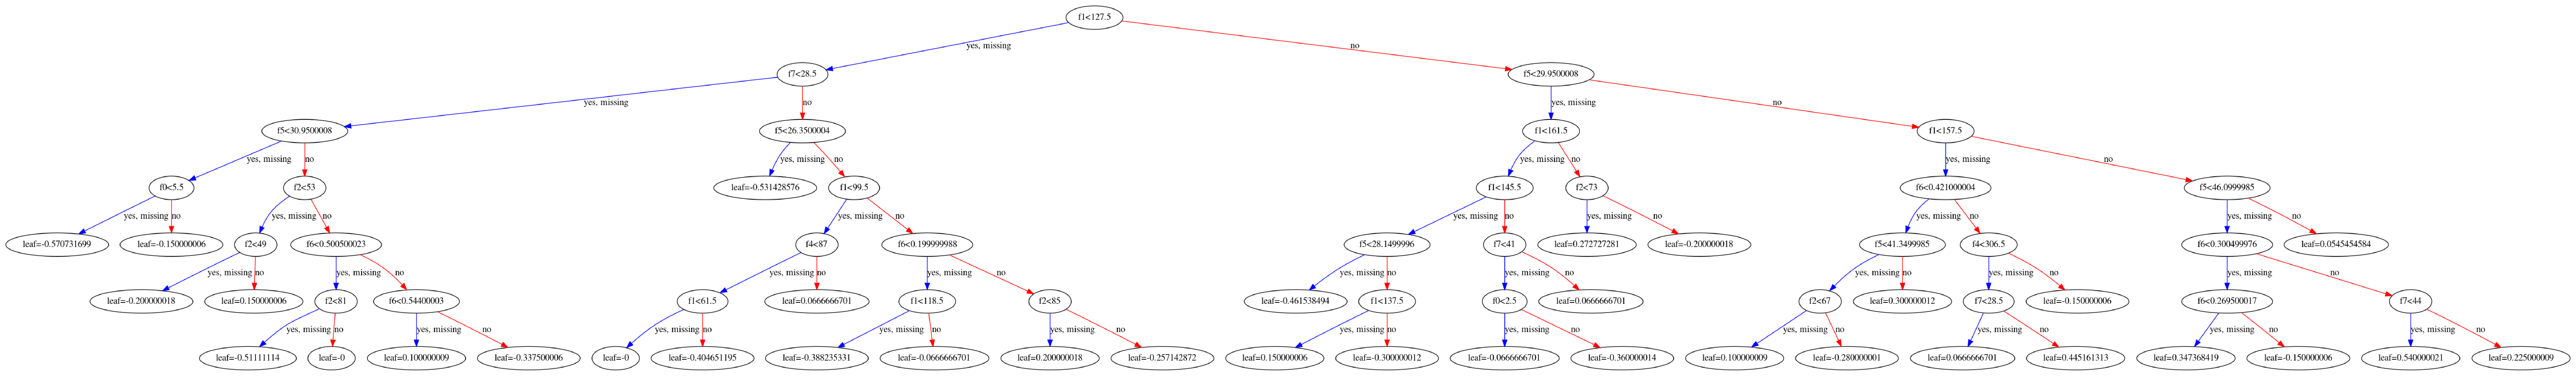

In [7]:
# 의사 결정 트리 시각화
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os 
# graphviz 경로 설정
#os.environ["PATH"] += (os.pathsep + '/opt/conda/envs/python3.6/lib/python3.6/site-packages/graphviz/' )


from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100, 200

plot_tree(model)
plt.show()

In [26]:
# 학습 데이터로 모델을 학습하기
model = XGBClassifier(max_depth=3)
model.fit( x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

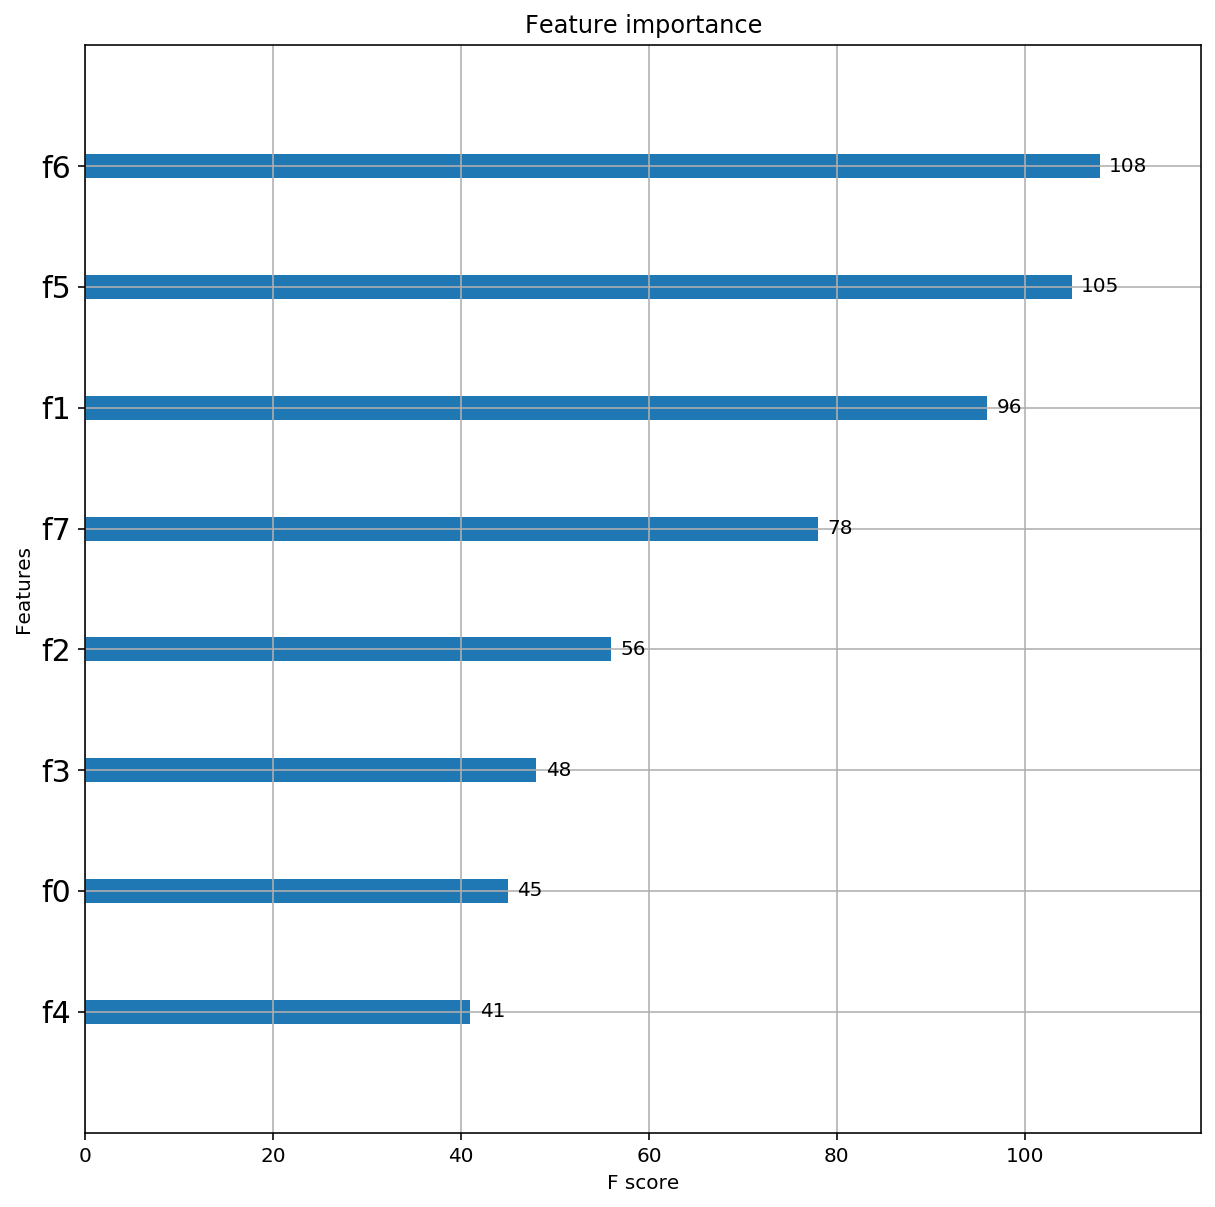

In [27]:
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)

plt.yticks(fontsize=15)
plt.show()